## Using Boston Median House Value dataset, using 12 different predictors. Developing regression model to fit the dataset

In [65]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [35]:
dir()

['Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 'Xma',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_17',
 '_18',
 '_19',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_3',
 '_31',
 '_32',
 '_33',
 '_4',
 '_5',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abline',
 'anova_lm',
 'ax',
 'design',
 'exit',
 'get_ipython',
 'infl',
 'load_data',
 'minus_age',
 'model',
 'model1',
 'model2',
 'model3',
 'newX',
 'new_df',
 'new_predictions',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'results',
 'results1',
 'results3',
 'sm',
 

Constructing model matrices using ModelSpec() to transform from ISLP.models
Using Boston housing data set
Building regression model to predict medv (median house value) using 12 different predictors

In [36]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Creating model matrix by hand, medv is response and lstat (percent of lower status population) is predictor

In [37]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Fitting model:

In [38]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [39]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Transforming model

In [40]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        18:53:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [43]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [44]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

These are the predicted median house values for 5, 10, and 15 values of lstat

Making confidence interval (95%)

In [45]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Making 95% prediction interval

In [46]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

Plotting regression line

In [47]:
def abline(ax, b, m, *args, **kwargs):
    # Adds a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\rahul\AppData\Local\Temp\ipykernel_9928\2944956618.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)


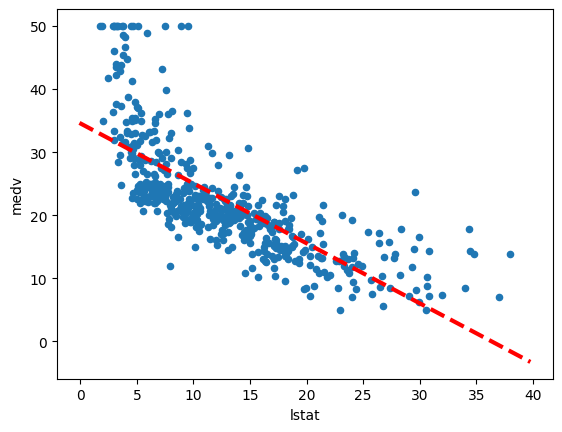

In [48]:
ax = Boston.plot.scatter('lstat','medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

Data makes sense logically; the more lower status population, the lower house values are

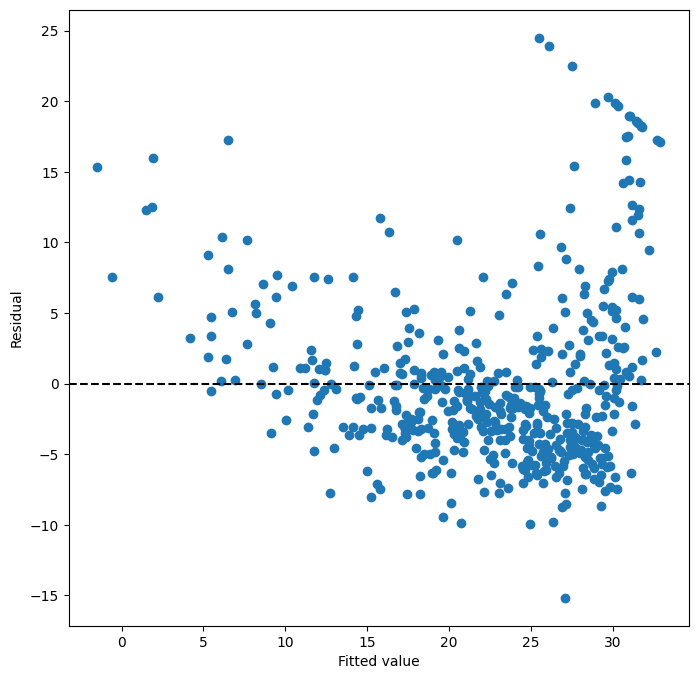

In [49]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Visible pattern in residual plot, need to refine model

Getting leverage plot to determine points of high leverage

380

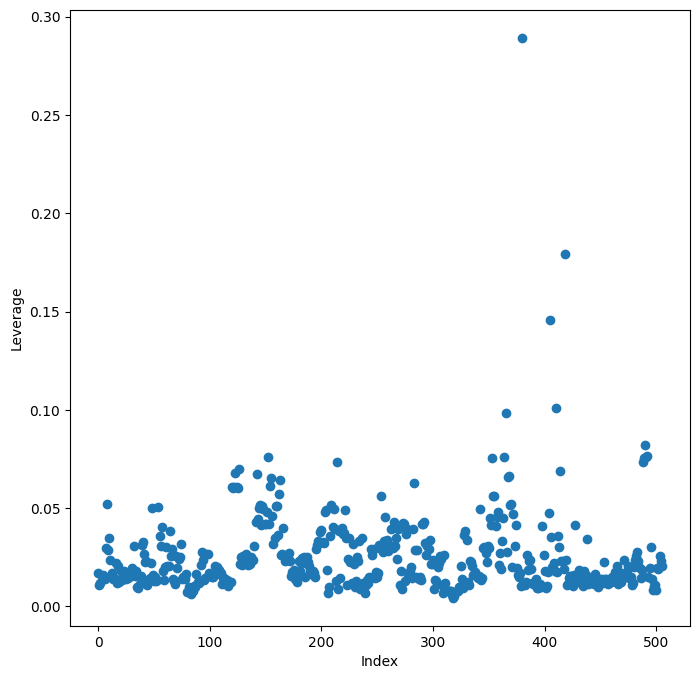

In [66]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Multiple Linear Regression

In [67]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [68]:
terms = Boston.columns.drop('medv')

In [69]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


Age has a high P-value so dropping it

In [54]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


Getting Variance Inflation Factor (VIF)

In [70]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index = X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


Interaction term between lstat and age

In [56]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


Using a polynomial of degree two to model the data

In [25]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


Comparing model fit

In [57]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


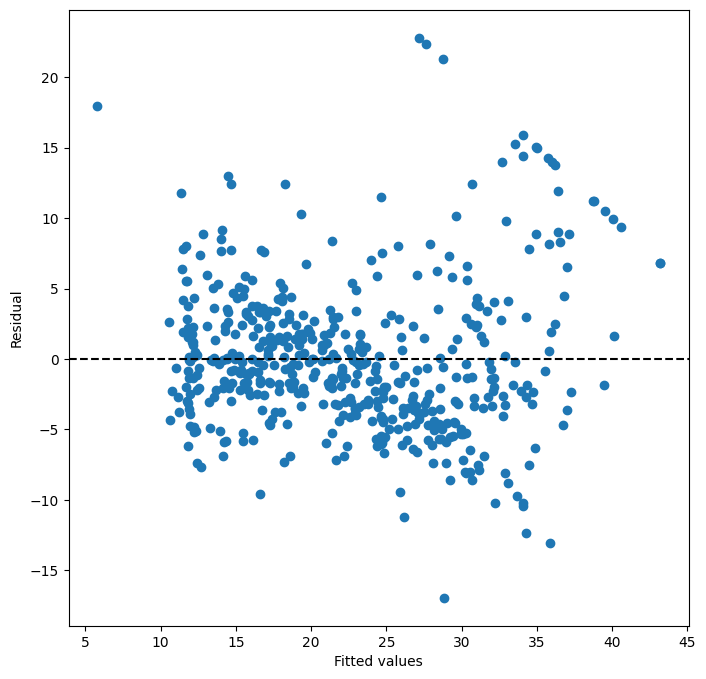

In [58]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Leverage graph

374

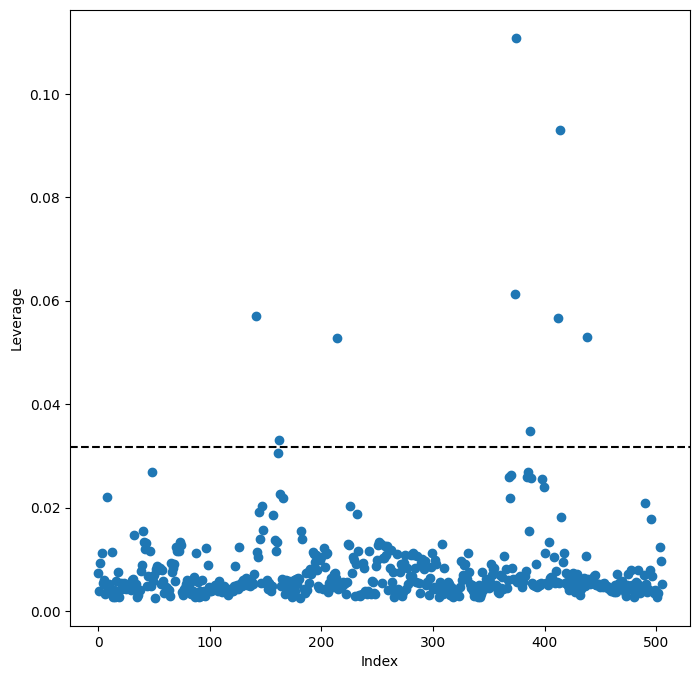

In [59]:
infl = results3.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(np.average(infl.hat_matrix_diag)*4, c='k', ls='--') # Draws dashed line at 4 times the average leverage to detect unusually high leverages
np.argmax(infl.hat_matrix_diag)

In [60]:
enum = [x for x in enumerate(infl.hat_matrix_diag)]
dtype = [('index', int), ('leverage', 'float')]
a = np.array(enum, dtype=dtype)
np.sort(a, order='leverage')[-7:]

array([(214, 0.05286488), (438, 0.05301457), (412, 0.05656834),
       (141, 0.05702003), (373, 0.06122147), (414, 0.0929207 ),
       (374, 0.11084186)], dtype=[('index', '<i4'), ('leverage', '<f8')])

The listed data points are all points of unusually high leverage

Analyzing studentized residuals to get a better sense of variation in the model

In [61]:
stu_resid = results3.get_influence().get_resid_studentized_external()

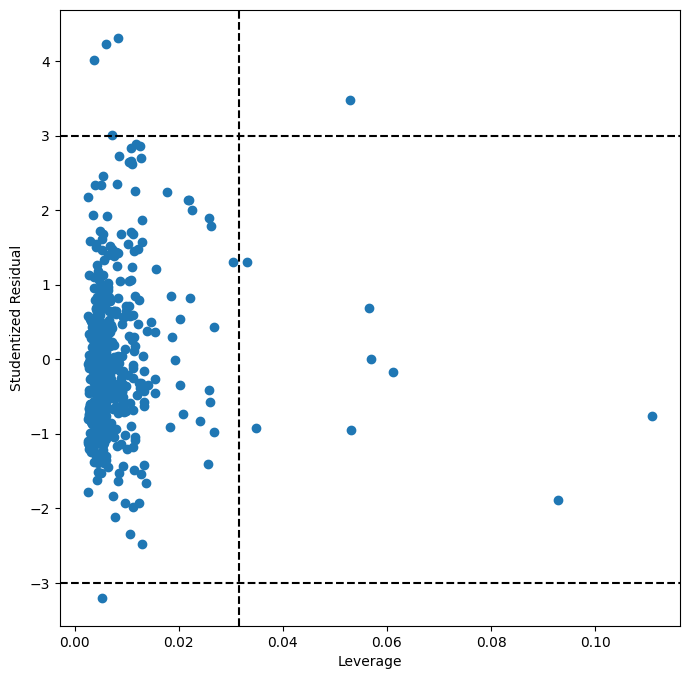

In [62]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(infl.hat_matrix_diag, stu_resid)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residual')
ax.axhline(-3, c='k', ls='--') # Unusually high studentized residual
ax.axhline(3, c='k', ls='--')
ax.axvline(np.average(infl.hat_matrix_diag)*4, c='k', ls='--') # Unusually high leverage line

In [64]:
enum = [x for x in enumerate(stu_resid)]
dtype = [('index', int), ('stu_resid', 'float')]
a = np.array(enum, dtype=dtype)
np.sort(a, order='stu_resid')[-4:]

array([(214, 3.47183651), (267, 4.01062645), (372, 4.22713356),
       (371, 4.31206993)], dtype=[('index', '<i4'), ('stu_resid', '<f8')])

Observations 214, 267, 372, and 371 are potential outliers. 214 also has unusually high leverage